# Before dabl

In [8]:
!pwd

/home/andy/checkout/talks_odt/2019


In [9]:
!ls ../../ml-workshop-2-of-4

check_env.ipynb  LICENSE    README2-of-4.pdf  slides
images		 notebooks  README.md


In [33]:
import pandas as pd
data = pd.read_csv("../../ml-workshop-2-of-4/notebooks/data/adult.csv", index_col=0)
target = data.income
data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, target)

In [1]:
import pandas as pd
data = pd.read_csv("adult.csv", index_col=0)

In [31]:
df.dtypes

income      object
variable    object
value       object
dtype: object

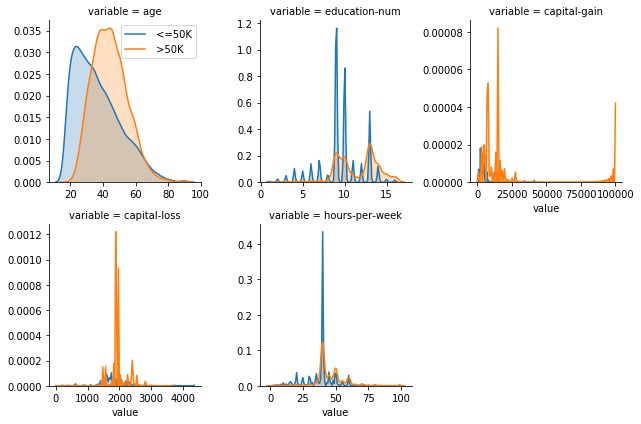

In [48]:
import pandas as pd
import seaborn as sns

data = pd.read_csv("adult.csv", index_col=0)

cols = data.columns[data.dtypes != object].tolist() + ['income']
df = data.loc[:, cols].melt("income")
g = sns.FacetGrid(df, col='variable', hue='income',
                  sharey=False, sharex=False, col_wrap=3)
g = g.map(sns.kdeplot, "value", shade=True)
g.axes[0].legend()

In [20]:
# %load solutions/adult_classification.py
import pandas as pd
data = pd.read_csv("../../ml-workshop-2-of-4/notebooks/data/adult.csv", index_col=0)
target = data.income
data_features = data.drop("income", axis=1)
X_train, X_test, y_train, y_test = train_test_split(data_features, target)


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

categorical_columns = data_features.dtypes == object

cont_pipe = Pipeline([('scaler', StandardScaler()),
                      ('imputer', SimpleImputer(strategy='median', add_indicator=True))])
cat_pipe = Pipeline([('ohe', OneHotEncoder(handle_unknown='ignore')),
                     ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True))])

pre = ColumnTransformer([('categorical', cat_pipe, categorical_columns),
                         ('continuous', cont_pipe, ~categorical_columns),
                        ])

model = Pipeline([('preprocessing', pre), ('clf', LogisticRegression())])
param_grid = {'clf__C': np.logspace(-3, 3, 7)}
grid_search = GridSearchCV(model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. In

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessing',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('categorical',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('ohe',
                                                                                          OneHotEncoder(categories='auto',
                                                                                                        drop=None,
                              

In [19]:
categorical_columns

age               False
workclass          True
education          True
education-num     False
marital-status     True
occupation         True
relationship       True
race               True
gender             True
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
dtype: bool

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [ ]:

### Preprocessing


scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

### Cross-validation with default parameters
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print(scores.mean())


### do grid search

import numpy as np

param_grid = {'C': np.logspace(-3, 3, 7)}
param_grid

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5,
                    return_train_score=True)

grid.fit(X_train, y_train)

grid.best_params_
grid.best_score_

# some visualization

import pandas as pd
%matplotlib inline
res = pd.DataFrame(grid.cv_results_)
res.mean_test_score.plot()
res.mean_train_score.plot()
import matplotlib.pyplot as plt
plt.xscale("log")

grid.score(X_test, y_test)

important = np.argsort(np.abs(grid.best_estimator_.coef_)).ravel()

plt.barh(range(10), grid.best_estimator_.coef_.ravel()[important[-10:]])
plt.yticks(range(10), X_train.columns[important[-10:]]);


In [50]:
import dabl
ames_df = dabl.datasets.load_ames()
ames_df.head()


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [54]:
clean_df = dabl.clean(ames_df, verbose=2)

Detected feature types:
11 float, 28 int, 43 object, 0 date, 0 other
Interpreted as:
continuous      23
dirty_float      0
low_card_int     6
categorical     40
date             0
free_string      0
useless         13
dtype: int64
WARN dropped useless columns: ['Order', 'Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']


In [65]:
from dabl import EasyPreprocessor

In [61]:
X, y = ames_df.drop('SalePrice', axis=1), ames_df.SalePrice
ep =  EasyPreprocessor().fit(X, y)

/home/andy/checkout/dabl/dabl/preprocessing.py:258: UserWarning: Discarding near-constant features: ['Street', 'Utilities', 'Land Slope', 'Condition 2', 'Roof Matl', 'Heating', 'Low Qual Fin SF', 'Kitchen AbvGr', 'Garage Cond', '3Ssn Porch', 'Pool Area', 'Misc Val']
  near_constant.index[near_constant].tolist()))


In [63]:
ep.ct_

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.1,
                  transformer_weights=None,
                  transformers=[('continuous',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
      

In [1]:
data = pd.read_csv("../../ml-workshop-2-of-4/notebooks/data/adult.csv", index_col=0)


NameError: name 'pd' is not defined

In [74]:
!ln -s "../../ml-workshop-2-of-4/notebooks/data/adult.csv" .

In [3]:
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter('ignore', ConvergenceWarning)

In [2]:
from dabl import SimpleClassifier
import pandas as pd
data = pd.read_csv("adult.csv", index_col=0)
SimpleClassifier().fit(data, target_col='income')

/home/andy/checkout/dabl/dabl/preprocessing.py:258: UserWarning: Discarding near-constant features: ['capital-loss']
  near_constant.index[near_constant].tolist()))


Running DummyClassifier(strategy='prior')
accuracy: 0.759 average_precision: 0.241 f1_macro: 0.432 recall_macro: 0.500 roc_auc: 0.500
=== new best DummyClassifier(strategy='prior') (using recall_macro):
accuracy: 0.759 average_precision: 0.241 f1_macro: 0.432 recall_macro: 0.500 roc_auc: 0.500

Running GaussianNB()
accuracy: 0.407 average_precision: 0.288 f1_macro: 0.405 recall_macro: 0.605 roc_auc: 0.607
=== new best GaussianNB() (using recall_macro):
accuracy: 0.407 average_precision: 0.288 f1_macro: 0.405 recall_macro: 0.605 roc_auc: 0.607

Running MultinomialNB()
accuracy: 0.831 average_precision: 0.773 f1_macro: 0.787 recall_macro: 0.815 roc_auc: 0.908
=== new best MultinomialNB() (using recall_macro):
accuracy: 0.831 average_precision: 0.773 f1_macro: 0.787 recall_macro: 0.815 roc_auc: 0.908

Running DecisionTreeClassifier(class_weight='balanced', max_depth=1)
accuracy: 0.710 average_precision: 0.417 f1_macro: 0.682 recall_macro: 0.759 roc_auc: 0.759
Running DecisionTreeClassifie

/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)
/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. In

Running LogisticRegression(C=0.1, class_weight='balanced')
accuracy: 0.819 average_precision: 0.789 f1_macro: 0.783 recall_macro: 0.832 roc_auc: 0.915
=== new best LogisticRegression(C=0.1, class_weight='balanced') (using recall_macro):
accuracy: 0.819 average_precision: 0.789 f1_macro: 0.783 recall_macro: 0.832 roc_auc: 0.915


Best model:
LogisticRegression(C=0.1, class_weight='balanced')
Best Scores:
accuracy: 0.819 average_precision: 0.789 f1_macro: 0.783 recall_macro: 0.832 roc_auc: 0.915


/home/andy/checkout/scikit-learn/sklearn/linear_model/logistic.py:932: ConvergenceWarning: lbfgs failed to converge (status=1): b'STOP: TOTAL NO. of ITERATIONS REACHED LIMIT'. Increase the number of iterations.
  n_iter_i = _check_optimize_result(solver, opt_res, max_iter)


SimpleClassifier(random_state=None, refit=True, verbose=1)

In [6]:
import pandas as pd
data = pd.read_csv("adult.csv", index_col=0)
from dabl.models import AnyClassifier
AnyClassifier(verbose=1, force_exhaust_budget=False).fit(data, target_col='income')

/home/andy/checkout/dabl/dabl/preprocessing.py:258: UserWarning: Discarding near-constant features: ['capital-loss']
  near_constant.index[near_constant].tolist()))


n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 7
r_min_: 20
max_budget_: 32561
aggressive_elimination: False
force_exhaust_budget: False
ratio: 3
----------
iter_i: 0
n_candidates: 26
r_i: 20
Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------
iter_i: 1
n_candidates: 9
r_i: 60
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


----------
iter_i: 2
n_candidates: 3
r_i: 180
Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:   15.4s finished


best classifier:  HistGradientBoostingClassifier(l2_regularization=0.0001, learning_rate=0.1,
                               loss='auto', max_bins=16, max_depth=7,
                               max_iter=200, max_leaf_nodes=4,
                               min_samples_leaf=4, n_iter_no_change=None,
                               random_state=7320, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)
best score: 0.773


AnyClassifier(force_exhaust_budget=False, n_jobs=None, verbose=1)

In [7]:
ac = Out[6]

In [9]:
import dabl
dabl.explain(ac)

ValueError: Don't know how to explain estimator HistGradientBoostingClassifier(l2_regularization=0.0001, learning_rate=0.1,
                               loss='auto', max_bins=16, max_depth=7,
                               max_iter=200, max_leaf_nodes=4,
                               min_samples_leaf=4, n_iter_no_change=None,
                               random_state=7320, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False) yet.